In [26]:
import numpy as np
import matplotlib.pyplot as plt
import sys,os
sys.path.insert(0, '/home/noah/Desktop/large_analysis/ca_analysis')
import fileread as fr
from scipy.signal import fftconvolve
import predefined as pd
import wave_ops as wo
from scipy import signal

run='/home/noah/Desktop/large_analysis/ca_analysis/Run_131_0.bin'
length=3500
numwaves=int((os.stat(run).st_size-8)/(7033))
data=fr.raw(run,length=length,row=1000,numwaves=numwaves-1000)
data=pd.single_pixel(data,1,3)
wo.baseline_restore(data,600)
print(data['requesttime'][0:5]*4E-9)
data=np.sort(data,order='requesttime')
print(data['requesttime'][0:5]*4E-9)

[0.17752339 0.17755603 0.17982542 0.18047978 0.18331562]
[0.17752339 0.17755603 0.17982542 0.18047978 0.18331562]


3500


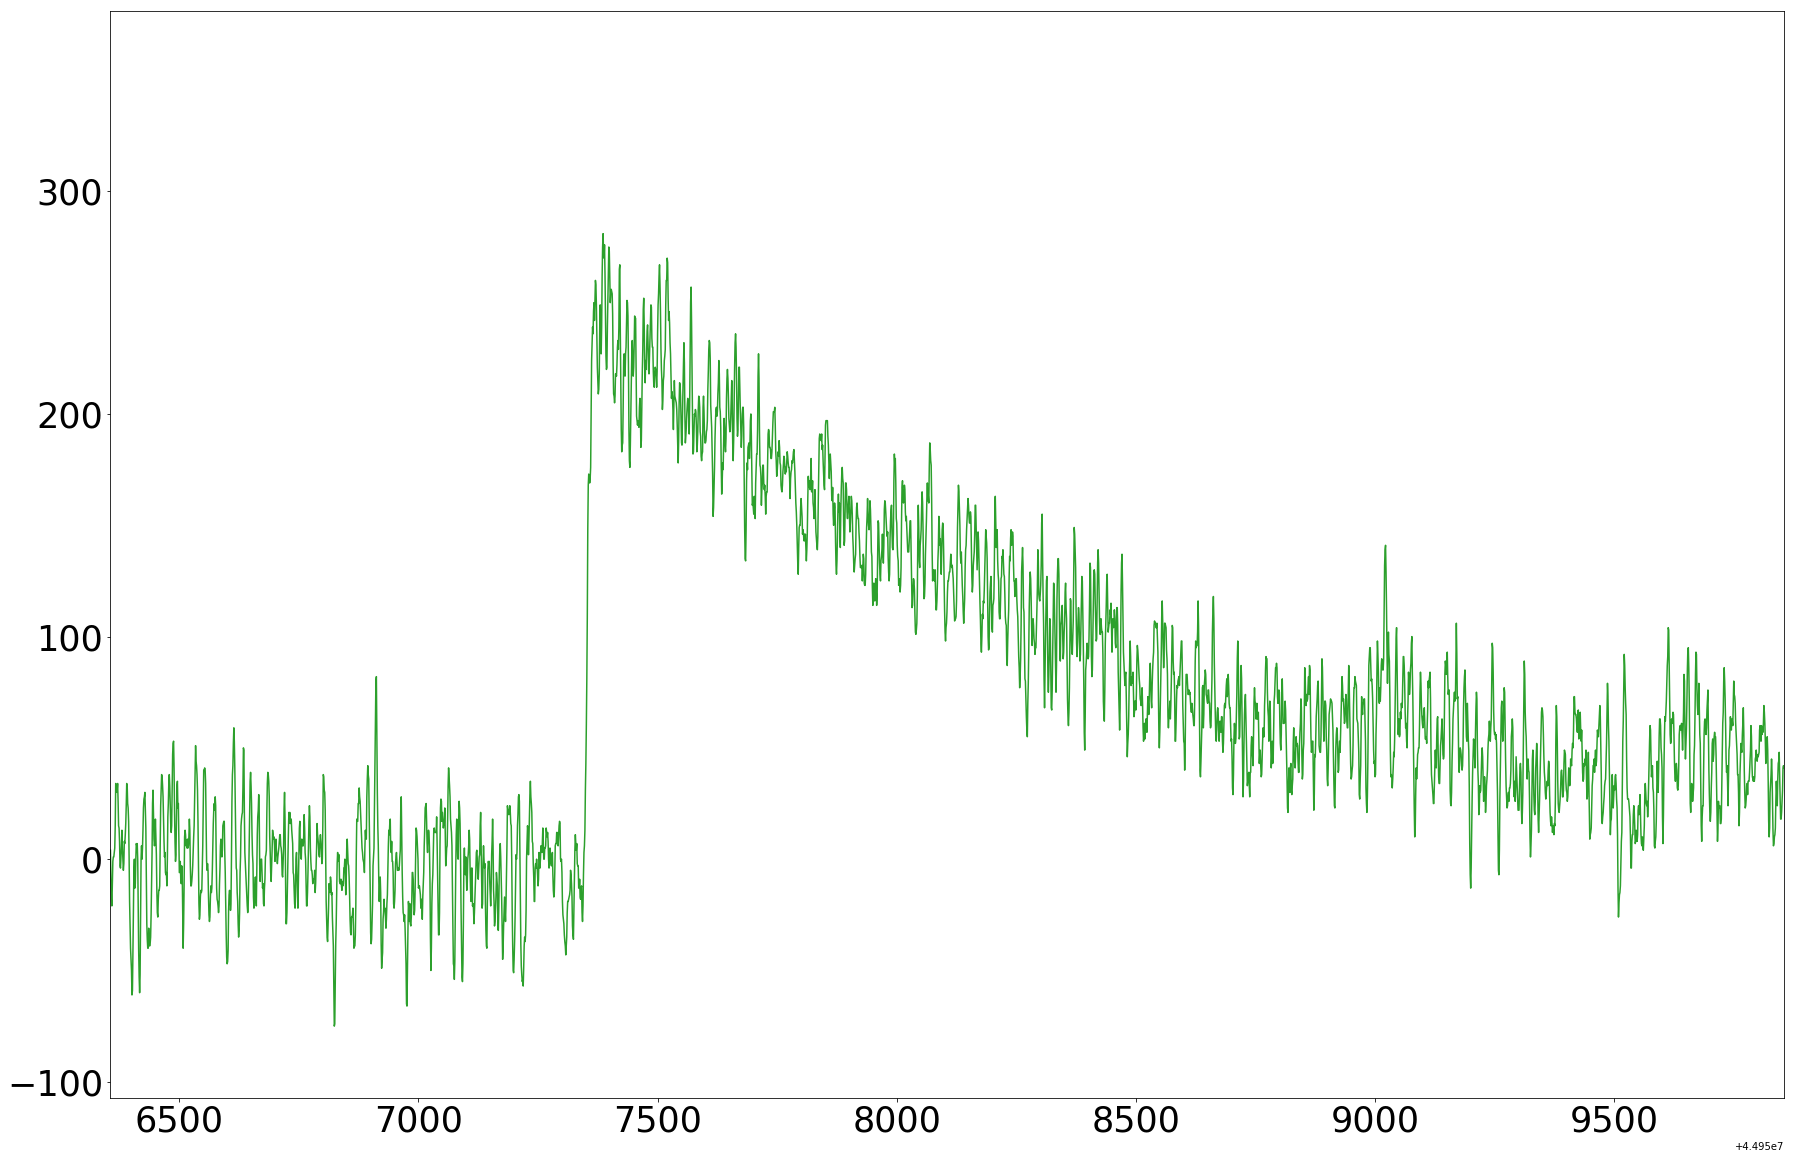

In [37]:
fs=35
N=5
t=np.arange(length)
print(len(t))
plt.figure(figsize=(30,20))
beg,end=data['requesttime'][0],data['requesttime'][1]
longt=end-beg+3500
longt=np.arange(longt)
for i in range(N):
    plt.plot(t+data['requesttime'][i],data['wave'][i])
plt.plot(beg+longt,31.03*np.sin(2*np.pi/3500.*longt+2),'r--',label=r'$A\cdot sin(\omega\ctot t + \phi)$')
plt.tick_params(labelsize=fs)
plt.xlim(data['requesttime'][2],data['requesttime'][2]+3500)
plt.show()